V(t) - V_old + (V_new-V_old)(1-exp(-t/tau))

V_old = island volume after Dorian
V_new = island volume before Dorian == fully recovered state
tau = morphological time scale

tau = (V_new-V_old)/(dV/dt)


tau =  1.8273972602739643
t_50, t_95:  1.266655258721867 5.474392949206857


Text(0, 0.5, 'Volume (Mm$^3$)')

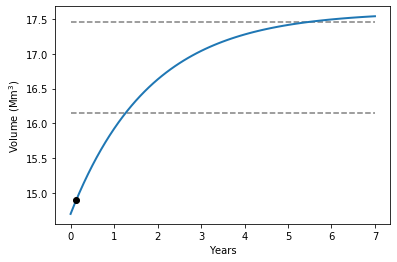

In [22]:
import numpy as np
import matplotlib.pyplot as plt

V_old = 14.7 # volume after Dorian
V_new = 17.6 # fully-recovered volume (same as pre-Dorian volume)
V_nov = 14.9 # volume 46 days after Dorian (partially recovered)

# calculate morph. time scale tau
dV = (V_nov-V_old)
dt = 46/365
tau = (V_new-V_old)/(dV/dt)
print('tau = ',tau)

# calculate half-life toward recovery (t_50) and "full" recovery (t_95)
t_50 = -tau*np.log(.5)
t_95 = -tau*np.log(.05)
print('t_50, t_95: ',t_50, t_95)

# time series of volume
t = np.arange(0.,7.1,.1)
Vt = V_old + (V_new-V_old)*(1.-np.exp(-t/tau))

# plot
plt.plot(t,np.ones_like(t)*V_50,'--',c='gray')
plt.plot(t,np.ones_like(t)*V_95,'--',c='gray')
plt.plot(t,Vt,linewidth=2)
plt.plot(dt,V_nov,'ok')
plt.xlabel('Years')
plt.ylabel('')
plt.ylabel('Volume (Mm$^3$)')

#### Add linear recovery and uncertainty

tau = 1.83
exponential t_50, t_95: 1.27, 5.47
linear t_lin: 1.83


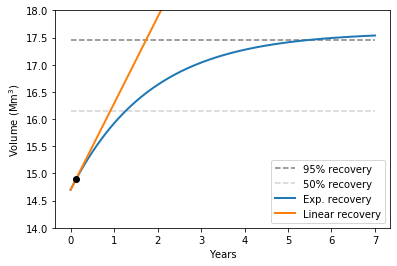

In [34]:
V_old = 14.7 # volume after Dorian
V_new = 17.6 # fully-recovered volume (same as pre-Dorian volume)
V_nov = 14.9 # volume 46 days after Dorian (partially recovered)

# calculate morph. time scale tau
dV = (V_nov-V_old)
dt = 46/365
tau = (V_new-V_old)/(dV/dt)
print('tau = {:.2f}'.format(tau))

# calculate half-life toward recovery (t_50) and "full" recovery (t_95)
t_50 = -tau*np.log(.5)
t_95 = -tau*np.log(.05)
print('exponential t_50, t_95: {:.2f}, {:.2f}'.format(t_50, t_95))

# calculate linear recovery time
t_lin = (V_new-V_old)/(dV/dt)
print('linear t_lin: {:.2f}'.format(t_lin))

# time series of volume
t = np.arange(0.,7.1,.1)
Vt = V_old + (V_new-V_old)*(1.-np.exp(-t/tau))
Vt_lin = V_old + ((V_nov-V_old)/dt)*t

# plot
plt.plot(t,np.ones_like(t)*V_95,'--',c='gray',label='95% recovery')
plt.plot(t,np.ones_like(t)*V_50,'--',c='lightgray',label='50% recovery')
plt.plot(t,Vt,linewidth=2,label='Exp. recovery')
plt.plot(t,Vt_lin,linewidth=2,label='Linear recovery')
plt.plot(dt,V_nov,'ok')
plt.xlabel('Years')
plt.ylabel('')
plt.ylabel('Volume (Mm$^3$)')
plt.ylim((14,18))
plt.legend()